In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6]), array([500, 553, 546, 521, 550, 490, 459], dtype=int64))


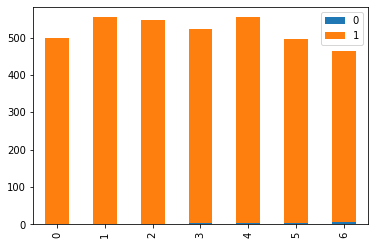

In [7]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/22 [==============================] - 1s 8ms/step - loss: 1.9042 - accuracy: 0.1713 - val_loss: 1.7970 - val_accuracy: 0.2928

Epoch 00001: saving model to model\keypoint_classifier.hdf5
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.7754 - accuracy: 0.2782 - val_loss: 1.6717 - val_accuracy: 0.3039

Epoch 00002: saving model to model\keypoint_classifier.hdf5
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.6622 - accuracy: 0.3500 - val_loss: 1.5518 - val_accuracy: 0.4199

Epoch 00003: saving model to model\keypoint_classifier.hdf5
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.5524 - accuracy: 0.4064 - val_loss: 1.4349 - val_accuracy: 0.4199

Epoch 00004: saving model to model\keypoint_classifier.hdf5
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.4360 - accuracy: 0.4433 - val_loss: 1.3273 - val_accuracy: 0.4199

Epoch 00005: saving model to model\keypoint_c

22/22 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.7557 - val_loss: 0.3375 - val_accuracy: 0.9492

Epoch 00041: saving model to model\keypoint_classifier.hdf5
Epoch 42/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.7697 - val_loss: 0.3273 - val_accuracy: 0.9646

Epoch 00042: saving model to model\keypoint_classifier.hdf5
Epoch 43/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7708 - val_loss: 0.3213 - val_accuracy: 0.9646

Epoch 00043: saving model to model\keypoint_classifier.hdf5
Epoch 44/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.7609 - val_loss: 0.3082 - val_accuracy: 0.9724

Epoch 00044: saving model to model\keypoint_classifier.hdf5
Epoch 45/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7789 - val_loss: 0.2942 - val_accuracy: 0.9713

Epoch 00045: saving model to model\keypoint_classifier

22/22 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8132 - val_loss: 0.1833 - val_accuracy: 0.9823

Epoch 00081: saving model to model\keypoint_classifier.hdf5
Epoch 82/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.8305 - val_loss: 0.1789 - val_accuracy: 0.9845

Epoch 00082: saving model to model\keypoint_classifier.hdf5
Epoch 83/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.8202 - val_loss: 0.1794 - val_accuracy: 0.9856

Epoch 00083: saving model to model\keypoint_classifier.hdf5
Epoch 84/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4409 - accuracy: 0.8265 - val_loss: 0.1677 - val_accuracy: 0.9878

Epoch 00084: saving model to model\keypoint_classifier.hdf5
Epoch 85/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.8220 - val_loss: 0.1826 - val_accuracy: 0.9823

Epoch 00085: saving model to model\keypoint_classifier

22/22 [==============================] - 0s 4ms/step - loss: 0.4149 - accuracy: 0.8471 - val_loss: 0.1412 - val_accuracy: 0.9890

Epoch 00121: saving model to model\keypoint_classifier.hdf5
Epoch 122/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8394 - val_loss: 0.1335 - val_accuracy: 0.9912

Epoch 00122: saving model to model\keypoint_classifier.hdf5
Epoch 123/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.4369 - accuracy: 0.8364 - val_loss: 0.1433 - val_accuracy: 0.9878

Epoch 00123: saving model to model\keypoint_classifier.hdf5
Epoch 124/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.8390 - val_loss: 0.1497 - val_accuracy: 0.9878

Epoch 00124: saving model to model\keypoint_classifier.hdf5
Epoch 125/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4124 - accuracy: 0.8500 - val_loss: 0.1493 - val_accuracy: 0.9890

Epoch 00125: saving model to model\keypoint_classi

22/22 [==============================] - 0s 3ms/step - loss: 0.3820 - accuracy: 0.8589 - val_loss: 0.1236 - val_accuracy: 0.9878

Epoch 00161: saving model to model\keypoint_classifier.hdf5
Epoch 162/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3759 - accuracy: 0.8515 - val_loss: 0.1296 - val_accuracy: 0.9912

Epoch 00162: saving model to model\keypoint_classifier.hdf5
Epoch 163/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8637 - val_loss: 0.1260 - val_accuracy: 0.9912

Epoch 00163: saving model to model\keypoint_classifier.hdf5
Epoch 164/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8519 - val_loss: 0.1245 - val_accuracy: 0.9901

Epoch 00164: saving model to model\keypoint_classifier.hdf5
Epoch 165/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8662 - val_loss: 0.1263 - val_accuracy: 0.9890

Epoch 00165: saving model to model\keypoint_classi

22/22 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.8696 - val_loss: 0.1279 - val_accuracy: 0.9845

Epoch 00201: saving model to model\keypoint_classifier.hdf5
Epoch 202/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8699 - val_loss: 0.1176 - val_accuracy: 0.9856

Epoch 00202: saving model to model\keypoint_classifier.hdf5
Epoch 203/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8699 - val_loss: 0.1268 - val_accuracy: 0.9845

Epoch 00203: saving model to model\keypoint_classifier.hdf5
Epoch 204/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8681 - val_loss: 0.1189 - val_accuracy: 0.9867

Epoch 00204: saving model to model\keypoint_classifier.hdf5
Epoch 205/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8604 - val_loss: 0.1223 - val_accuracy: 0.9856

Epoch 00205: saving model to model\keypoint_classi

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 855us/step - loss: 0.1223 - accuracy: 0.9856


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[7.6829857e-04 4.0331764e-05 1.0889945e-05 3.8085643e-03 8.9455706e-01
 3.9630508e-09 1.0081483e-01]
4


# Confusion matrix

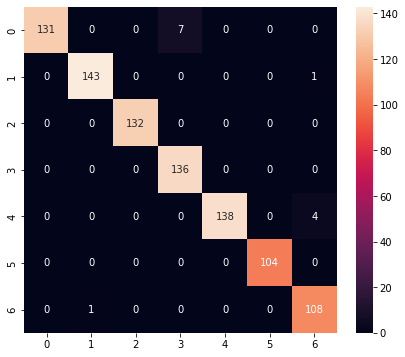

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       138
           1       0.99      0.99      0.99       144
           2       1.00      1.00      1.00       132
           3       0.95      1.00      0.97       136
           4       1.00      0.97      0.99       142
           5       1.00      1.00      1.00       104
           6       0.96      0.99      0.97       109

    accuracy                           0.99       905
   macro avg       0.99      0.99      0.99       905
weighted avg       0.99      0.99      0.99       905



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpdpiw7mzu\assets


6480

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 998 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.68298865e-04 4.03318772e-05 1.08899430e-05 3.80856567e-03
 8.94556999e-01 3.96306499e-09 1.00814864e-01]
4
